  # <font color = Green size =10> Clustering_Assignment

<font color = Brown size = 5>  __Problem Statement :__
    - HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

<font color = Gold size = 5>  __Objective:__
     - categorise the contries based on child mortality, income, imports, exports, fertility etc.., to provide facilities through Non governmental organization
     - provide the categorised data to the CEO of the organization 

In [537]:
# importing packages and libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [538]:
# Reading the data
NGO_clustering = pd.read_csv(r'C:\Users\Sai Srinivas\Downloads\Country-data.csv')
NGO_clustering.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [539]:
# checking the info of the data
NGO_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


### - from the above info we can see there are no null values in "Country-data"

In [540]:
NGO_clustering['exports']=NGO_clustering['exports']*NGO_clustering['gdpp']/100
NGO_clustering['health']=NGO_clustering['health']*NGO_clustering['gdpp']/100
NGO_clustering['imports']=NGO_clustering['imports']*NGO_clustering['gdpp']/100
NGO_clustering.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [541]:
NGO_clustering.shape

(167, 10)

In [542]:
NGO_clustering.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [543]:
#checking duplicate values
print(sum(NGO_clustering.duplicated(subset = 'country'))) 

0


#### - there are no duplicate values in the data

In [544]:
NGO_clustering.var()

child_mort    1.626423e+03
exports       3.230606e+08
health        3.245074e+06
imports       2.164079e+08
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64

- Income, exports, GDPP, imports and child mortality shows good variance among the variables

In [545]:
#correlation of the data
NGO_clustering.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


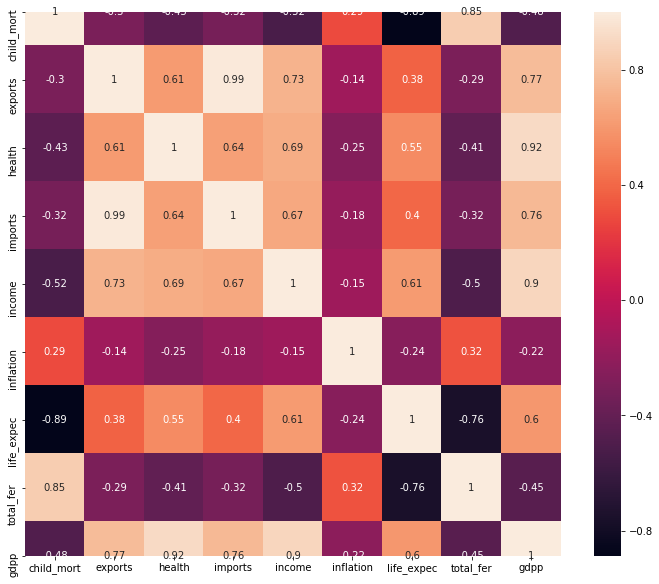

In [546]:
#correlation plot
plt.figure(figsize = (12, 10))
sns.heatmap(NGO_clustering.corr(), annot = True)
plt.savefig('corrplot')
plt.show()

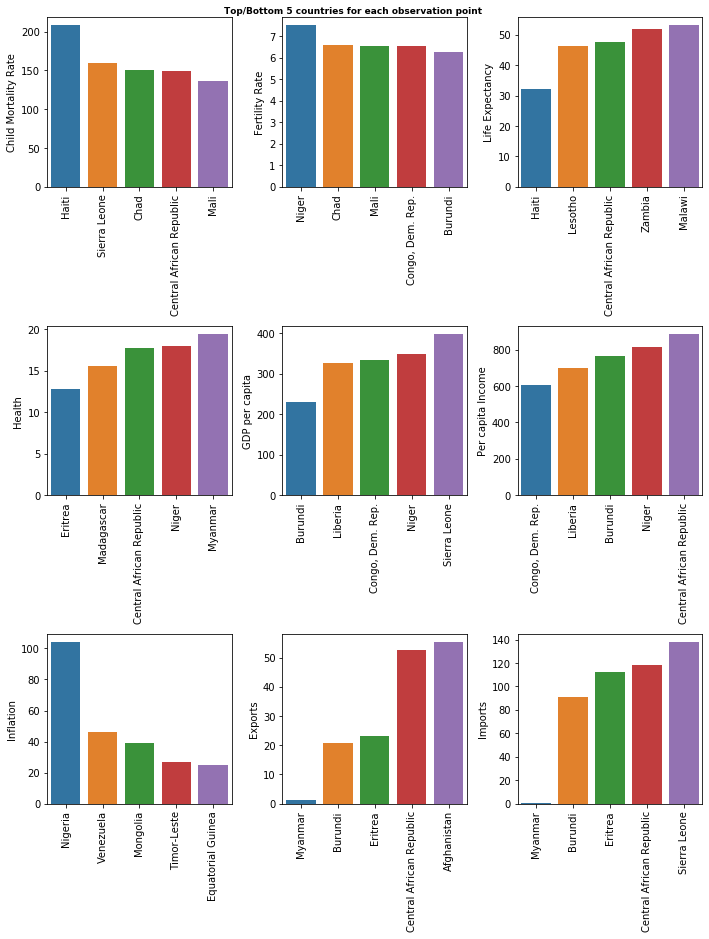

In [547]:
#
fig, axes = plt.subplots(3,3,figsize = (10,13))

fig.suptitle( '\n'.join(["Top/Bottom 5 countries for each observation point"]),fontsize=9,fontweight='bold',y=1)


# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

child_mort_top5 = NGO_clustering[['country','child_mort']].sort_values('child_mort', ascending = False).head(5)
plt1 = sns.barplot(x='country', y='child_mort', data= child_mort_top5, ax = axes[0,0])                       
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = NGO_clustering[['country','total_fer']].sort_values('total_fer', ascending = False).head(5)
plt1 = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axes[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bot5_lif_exp = NGO_clustering[['country','life_expec']].sort_values('life_expec', ascending = True).head(5)
plt1 = sns.barplot(x='country', y='life_expec', data= bot5_lif_exp, ax = axes[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bot5_health = NGO_clustering[['country','health']].sort_values('health', ascending = True).head(5)
plt1 = sns.barplot(x='country', y='health', data= bot5_health, ax = axes[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bot_5_gdp = NGO_clustering[['country','gdpp']].sort_values('gdpp', ascending = True).head(5)
plt1 = sns.barplot(x='country', y='gdpp', data= bot_5_gdp, ax = axes[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Income : income of the country

bot_5_income = NGO_clustering[['country','income']].sort_values('income', ascending = True).head(5)
plt1 = sns.barplot(x='country', y='income', data= bot_5_income, ax = axes[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top_5_gdp = NGO_clustering[['country','inflation']].sort_values('inflation', ascending = False).head(5)
plt1 = sns.barplot(x='country', y='inflation', data= top_5_gdp, ax = axes[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: checking the contries which are poorly performing in exports

bot5_exports = NGO_clustering[['country','exports']].sort_values('exports', ascending = True).head(5)
plt1 = sns.barplot(x='country', y='exports',data= bot5_exports, ax = axes[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: checking the contries which are poorly performing in imports

bot_5_imports = NGO_clustering[['country','imports']].sort_values('imports', ascending = True).head(5)
plt1 = sns.barplot(x='country', y='imports',data= bot_5_imports, ax = axes[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA_Countries')
plt.show()    

## - preparing the data for clustering

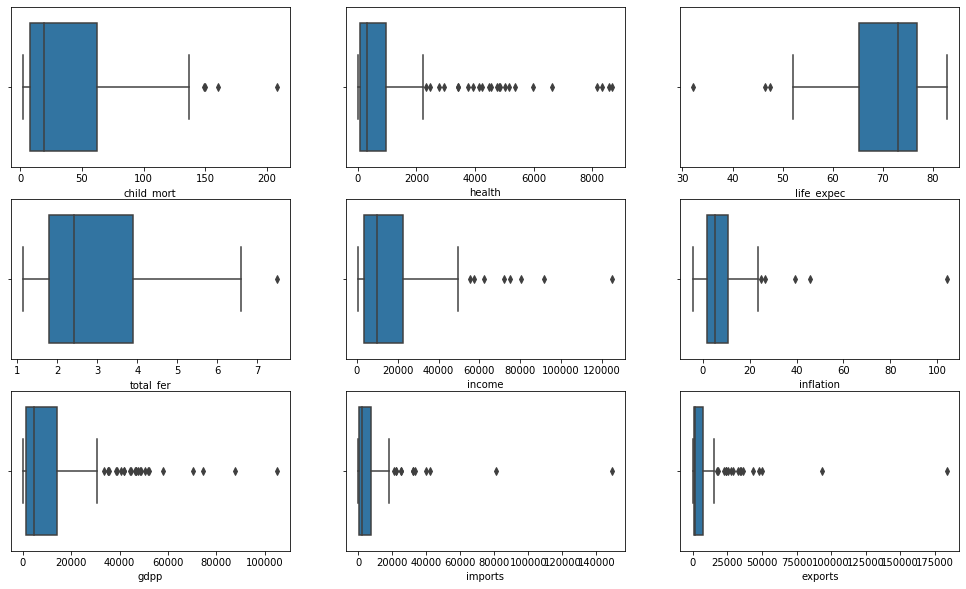

In [548]:
# checking for the outliers
fig, axs = plt.subplots(3,3, figsize = (17,10))
var = ['child_mort','health','life_expec','total_fer','income','inflation','gdpp','imports','exports']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data = NGO_clustering)


In [549]:
# copying the data frame 
new_data = NGO_clustering.copy()
new_data.head()
new_data.shape

(167, 10)

In [550]:
#capping (statistical) outliers

# outlier treatment for Child mortality
percentiles = new_data['child_mort'].quantile([0.05,0.95]).values
new_data['child_mort'][new_data['child_mort'] <= percentiles[0]] = percentiles[0]
new_data['child_mort'][new_data['child_mort'] >= percentiles[1]] = percentiles[1]


# outlier treatment for exports
percentiles = new_data['exports'].quantile([0.05,0.95]).values
new_data['exports'][new_data['exports'] <= percentiles[0]] = percentiles[0]
new_data['exports'][new_data['exports'] >= percentiles[1]] = percentiles[1]

# outlier treatment for health
percentiles = new_data['health'].quantile([0.05,0.95]).values
new_data['health'][new_data['health'] <= percentiles[0]] = percentiles[0]
new_data['health'][new_data['health'] >= percentiles[1]] = percentiles[1]

# outlier treatment for imports
percentiles = new_data['imports'].quantile([0.05,0.95]).values
new_data['imports'][new_data['imports'] <= percentiles[0]] = percentiles[0]
new_data['imports'][new_data['imports'] >= percentiles[1]] = percentiles[1]

# outlier treatment for income
percentiles = new_data['income'].quantile([0.05,0.95]).values
new_data['income'][new_data['income'] <= percentiles[0]] = percentiles[0]
new_data['income'][new_data['income'] >= percentiles[1]] = percentiles[1]

# outlier treatment for inflation
percentiles = new_data['inflation'].quantile([0.05,0.95]).values
new_data['inflation'][new_data['inflation'] <= percentiles[0]] = percentiles[0]
new_data['inflation'][new_data['inflation'] >= percentiles[1]] = percentiles[1]

# outlier treatment for life expectancy
percentiles = new_data['life_expec'].quantile([0.05,0.95]).values
new_data['life_expec'][new_data['life_expec'] <= percentiles[0]] = percentiles[0]
new_data['life_expec'][new_data['life_expec'] >= percentiles[1]] = percentiles[1]

# outlier treatment for total fertility
percentiles = new_data['total_fer'].quantile([0.05,0.95]).values
new_data['total_fer'][new_data['total_fer'] <= percentiles[0]] = percentiles[0]
new_data['total_fer'][new_data['total_fer'] >= percentiles[1]] = percentiles[1]

# outlier treatment for gdp
percentiles = new_data['gdpp'].quantile([0.05,0.95]).values
new_data['gdpp'][new_data['gdpp'] <= percentiles[0]] = percentiles[0]
new_data['gdpp'][new_data['gdpp'] >= percentiles[1]] = percentiles[1]



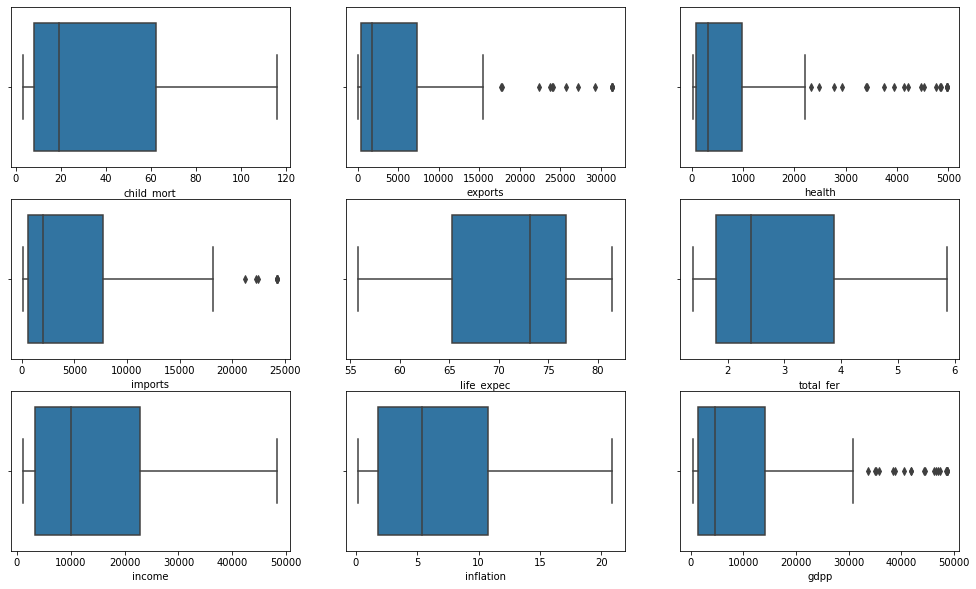

In [551]:
# Again checking for the outliers
fig, axs = plt.subplots(3,3, figsize = (17,10))
var = ['child_mort','exports','health','imports','life_expec','total_fer','income','inflation','gdpp']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data = new_data)

### SCALING

In [552]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
new_data[varlist] =scaler.fit_transform(new_data[varlist])
new_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,Albania,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,Algeria,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,Angola,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,Antigua and Barbuda,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


## <font color = Indium size = 5>  Principal Component Analysis

In [553]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(new_data[varlist])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [554]:
pca.components_

array([[-0.31370269,  0.3507987 ,  0.35117815,  0.36823124,  0.37600029,
        -0.17399218,  0.34308686, -0.29811056,  0.37600871],
       [ 0.48684113,  0.33097569,  0.24315695,  0.26930019,  0.16807187,
         0.20045729, -0.34450382,  0.51847097,  0.25664488],
       [-0.17763592,  0.06865384, -0.13607851, -0.04200452,  0.17010197,
         0.93794124,  0.15426058, -0.10473969, -0.00389912],
       [ 0.02276945, -0.53686278,  0.64515576, -0.38273615,  0.01264167,
         0.10608158,  0.18223721,  0.15311285,  0.28368985],
       [ 0.12839534, -0.08487856,  0.20033804, -0.04421243,  0.07457851,
         0.07932579, -0.67371553, -0.67970463,  0.08046529],
       [ 0.1076401 , -0.12068475, -0.4231057 , -0.38460027,  0.74879481,
        -0.17145666, -0.03640109,  0.06088361,  0.22757439],
       [-0.77529381, -0.03982588,  0.0371735 ,  0.00485008,  0.05733254,
        -0.02440683, -0.50118517,  0.37360537,  0.03574582],
       [-0.05482803,  0.44271452, -0.15457504, -0.49759106, -0

In [555]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([0.68508868, 0.14727819, 0.09507098, 0.03147493, 0.01636993,
       0.0119143 , 0.00890517, 0.00252245, 0.00137538])

Text(0, 0.5, 'Cumulative Variance')

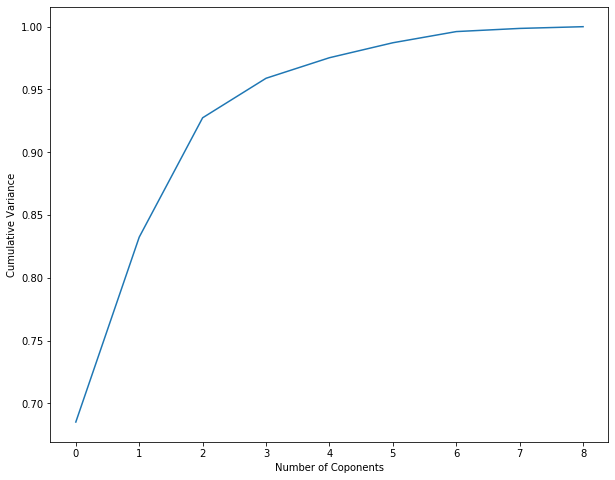

In [556]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

- 4 would be optimum number of principal componens from the above plot

In [557]:
#dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components =3)

In [558]:
# Transform the data here
df_pca = pca_final.fit_transform(new_data[varlist])
df_pca.shape

(167, 3)

In [559]:
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1],'PC3': pc[2]})

In [560]:
pca_df2.head()

,PC1,PC2,PC3
0,-3.131864,1.546735,-0.481322
1,-0.131783,-1.671861,-0.100295
2,-0.740848,-0.690890,1.551370
3,-3.160768,2.351711,1.228626
4,0.946167,-1.002425,-0.488946


In [561]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [562]:
#hopkins statistic
hopkins(pca_df2)

0.7845283453042124

In [563]:
#PCA dataframe
pca_df2.head()

,PC1,PC2,PC3
0,-3.131864,1.546735,-0.481322
1,-0.131783,-1.671861,-0.100295
2,-0.740848,-0.690890,1.551370
3,-3.160768,2.351711,1.228626
4,0.946167,-1.002425,-0.488946


In [564]:
#making sure that Principal components are not correlated
cormat = np.corrcoef(pca_df2.transpose())

In [565]:
cormat.shape

(3, 3)

In [566]:
print(cormat)

[[ 1.00000000e+00  3.34954072e-05 -1.61212726e-05]
 [ 3.34954072e-05  1.00000000e+00  4.13621601e-05]
 [-1.61212726e-05  4.13621601e-05  1.00000000e+00]]


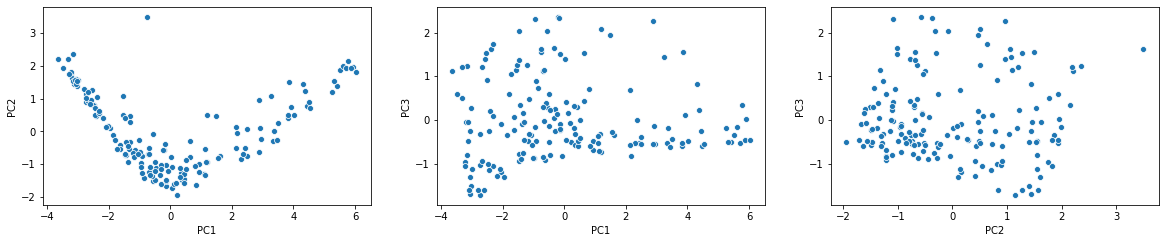

In [567]:
# pair plot for all 

plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.scatterplot(data=pca_df2, x='PC1', y='PC2')
plt.subplot(2,3,2)
sns.scatterplot(data=pca_df2, x='PC1', y='PC3')
plt.subplot(2,3,3)
sns.scatterplot(data=pca_df2, x='PC2', y='PC3')


#### - we can see the bases are very low and exponentials are too high which shows no correlation 

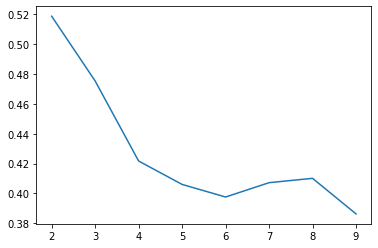

In [568]:
#First we'll do the silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(pca_df2)
    ss.append([k, silhouette_score(pca_df2, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

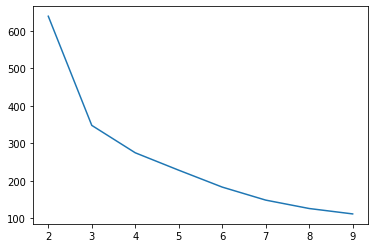

In [569]:
## elbow curve
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(pca_df2)
    ss.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [570]:
# here 4 seemed to be a good number for clustering after observing silhoutte score and elbow curves
model_kmean = KMeans(n_clusters = 4, random_state = 42)
model_kmean.fit(pca_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [571]:
pca_df2.head()

,PC1,PC2,PC3
0,-3.131864,1.546735,-0.481322
1,-0.131783,-1.671861,-0.100295
2,-0.740848,-0.690890,1.551370
3,-3.160768,2.351711,1.228626
4,0.946167,-1.002425,-0.488946


In [572]:
#adding kMeans labels(cluster id's) to the PCA frame
dat = pd.concat([pca_df2,pd.Series(model_kmean.labels_)], axis = 1)
dat.columns = ['PC1','PC2','PC3','Cluster_ID'] 
dat.head()

,PC1,PC2,PC3,Cluster_ID
0,-3.131864,1.546735,-0.481322,0
1,-0.131783,-1.671861,-0.100295,2
2,-0.740848,-0.690890,1.551370,2
3,-3.160768,2.351711,1.228626,0
4,0.946167,-1.002425,-0.488946,1


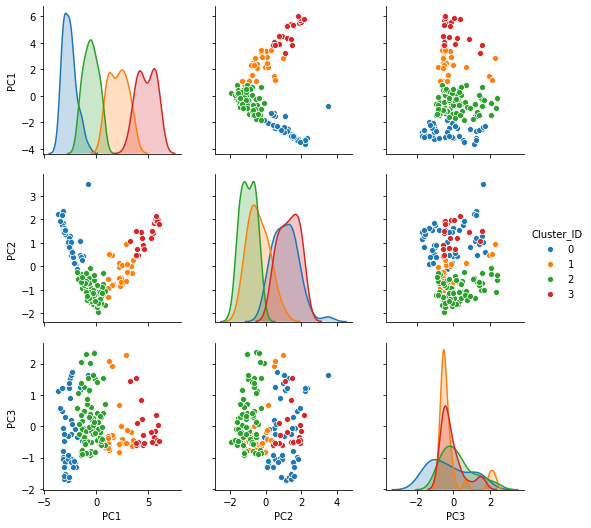

In [573]:
sns.pairplot(data=dat, vars=['PC1','PC2','PC3'],hue = "Cluster_ID")

In [574]:
#concatinating country variable to the clusters and PCA variables
NGO_clustering = pd.concat([new_data['country'],dat], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
NGO_clustering.head()

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-3.131864,1.546735,-0.481322,0
1,Albania,-0.131783,-1.671861,-0.100295,2
2,Algeria,-0.740848,-0.690890,1.551370,2
3,Angola,-3.160768,2.351711,1.228626,0
4,Antigua and Barbuda,0.946167,-1.002425,-0.488946,1


In [575]:
NGO_clustering.columns = ['country','PC1','PC2','PC3','Cluster_ID']
NGO_clustering.head()

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-3.131864,1.546735,-0.481322,0
1,Albania,-0.131783,-1.671861,-0.100295,2
2,Algeria,-0.740848,-0.690890,1.551370,2
3,Angola,-3.160768,2.351711,1.228626,0
4,Antigua and Barbuda,0.946167,-1.002425,-0.488946,1


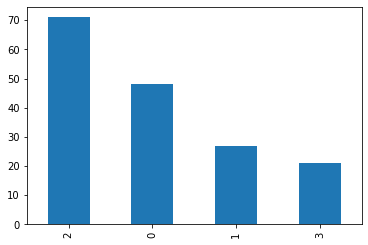

In [576]:
# Check the count of observation per cluster
NGO_clustering['Cluster_ID'].value_counts().plot(kind = 'bar')

In [577]:
#assigning clusters to the main data frame
NGO_clustered = NGO_clustering[['country','Cluster_ID']].merge(new_data, on = 'country')
NGO_clustered.head()

,country,Cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,Albania,2,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,Algeria,2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,Angola,0,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,Antigua and Barbuda,1,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [578]:
#taking mean for all the variables
clusters_child_mort = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).child_mort.mean())
clusters_exports = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).exports.mean())
clusters_health = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).health.mean())
clusters_imports = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).imports.mean())
clusters_income = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).income.mean())
clusters_inflation = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).inflation.mean())
clusters_life_expec = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).life_expec.mean())
clusters_total_fer = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).total_fer.mean())
clusters_gdpp = pd.DataFrame(NGO_clustered.groupby(["Cluster_ID"]).gdpp.mean())

In [579]:

df = pd.concat([pd.Series(list(range(0,4))), clusters_child_mort,clusters_exports, clusters_health, clusters_imports,
               clusters_income, clusters_inflation, clusters_life_expec,clusters_total_fer,clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,1.375494,-0.573152,-0.578715,-0.645858,-0.801295,0.459521,-1.312424,1.369385,-0.666986
1,1,-0.823207,0.506675,0.550386,0.664482,0.914709,-0.628825,0.838640,-0.790215,0.713089
2,2,-0.357374,-0.447677,-0.434442,-0.449185,-0.364832,0.112917,0.218717,-0.395731,-0.458072
3,3,-0.877314,2.172197,2.083965,2.140587,1.888956,-0.623610,1.182105,-0.776083,2.156431


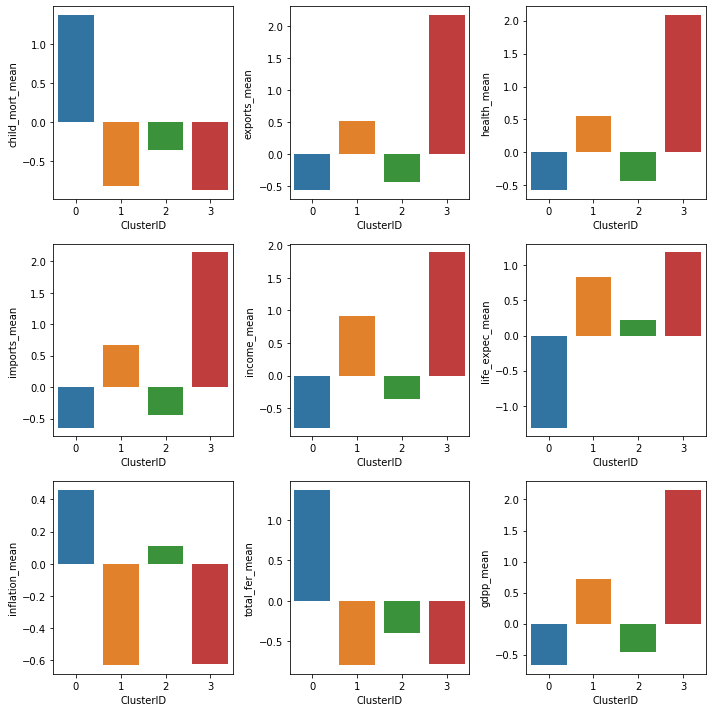

In [580]:
# plots of all clusters accross all the variables
fig, axs = plt.subplots(3,3,figsize = (10,10))

sns.barplot(x=df.ClusterID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

### insights
- from the above plots we can see the cluster "zero" has high child_mortality, fertility rates are high and gdpp, imports, exports and  life expectency are too low
- cluster 1 is doing better in exports and imports
- cluster 2 is showing negative in child mortality and inflation mean and better in GDPP mean 
- cluster 3 is showing positive in inflation mean and in rest it is showing negative

In [581]:
NGO_clustered[NGO_clustered.Cluster_ID == 0].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

<font size = 5 color = Radium>   following are the countries which obtained by KMeans clustering and need support from NGO : </font> 
    - Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia

<font size = 6 color = Blue> **Hierarchial Clustering:** </font>    
<br>

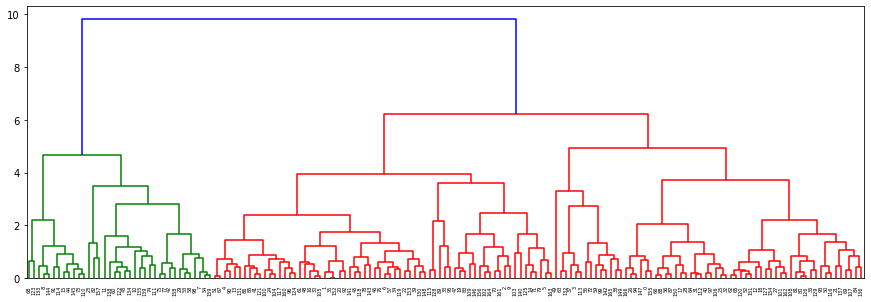

In [582]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


#hierarchical clustering using COMPLETE LINKAGE
plt.figure(figsize=(15,5))
mergings = linkage(pca_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

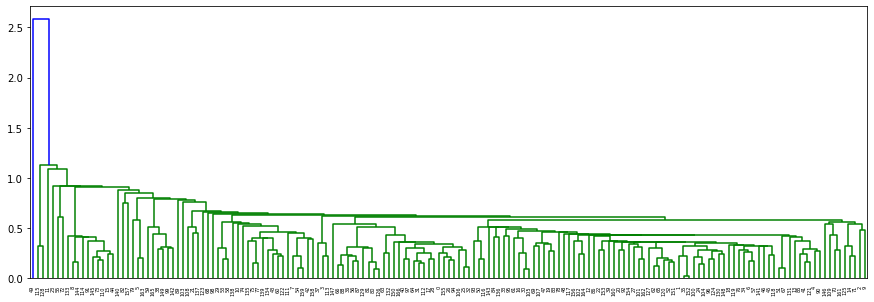

In [583]:
#hierarchical clustering using SINGLE LINKAGE
plt.figure(figsize=(15,5))
mergings = linkage(pca_df2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

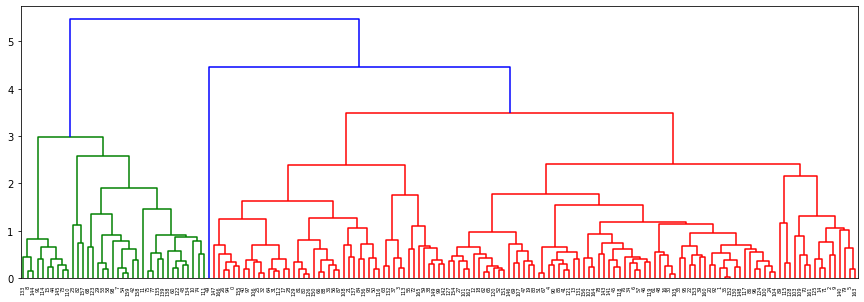

In [584]:
#hierarchical clustering using AVERAGE LINKAGE
plt.figure(figsize=(15,5))
mergings = linkage(pca_df2, method = "average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [585]:
# cutting the tree of complete linkage at a point
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
hc_clustering = pd.concat([pca_df2, clusterCut], axis=1)
hc_clustering.columns = ["PC1","PC2","PC3","Cluster_ID"]
hc_clustering.head()

,PC1,PC2,PC3,Cluster_ID
0,-3.131864,1.546735,-0.481322,0
1,-0.131783,-1.671861,-0.100295,1
2,-0.740848,-0.690890,1.551370,1
3,-3.160768,2.351711,1.228626,0
4,0.946167,-1.002425,-0.488946,1


In [586]:
hc_cluster = pd.concat([new_data['country'],hc_clustering], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
hc_cluster.head()

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-3.131864,1.546735,-0.481322,0
1,Albania,-0.131783,-1.671861,-0.100295,1
2,Algeria,-0.740848,-0.690890,1.551370,1
3,Angola,-3.160768,2.351711,1.228626,0
4,Antigua and Barbuda,0.946167,-1.002425,-0.488946,1


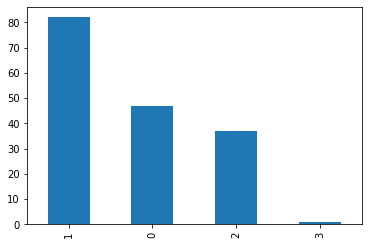

In [587]:
hc_cluster['Cluster_ID'].value_counts().plot(kind = 'bar')

In [588]:
hc_clustered = hc_cluster[['country','Cluster_ID']].merge(new_data, on = 'country')
hc_clustered.head()

,country,Cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,Albania,1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,Algeria,1,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,Angola,0,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,Antigua and Barbuda,1,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [589]:
#means of variables
child_mort_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).child_mort.mean())
exports_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).exports.mean())
health_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).health.mean())
imports_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).imports.mean())
income_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).income.mean())
inflation_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).inflation.mean())
life_expec_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).life_expec.mean())
total_fer_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).total_fer.mean())
gdpp_clustered = pd.DataFrame(hc_clustered.groupby(["Cluster_ID"]).gdpp.mean())

In [590]:
df_hc = pd.concat([pd.Series(list(range(0,4))), child_mort_clustered,exports_clustered, health_clustered, imports_clustered,
               income_clustered, inflation_clustered, life_expec_clustered,total_fer_clustered,gdpp_clustered], axis=1)
df_hc.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df_hc

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,1.361015,-0.607454,-0.588263,-0.675314,-0.844271,0.422155,-1.313988,1.364578,-0.688353
1,1,-0.411730,-0.350071,-0.387354,-0.335603,-0.234328,0.032786,0.262971,-0.438290,-0.378334
2,2,-0.871942,1.519381,1.609226,1.581639,1.558841,-0.668795,1.119803,-0.805154,1.703749
3,3,2.056000,1.039038,-0.129956,0.738562,1.218554,2.215708,-1.238917,1.595320,0.337301


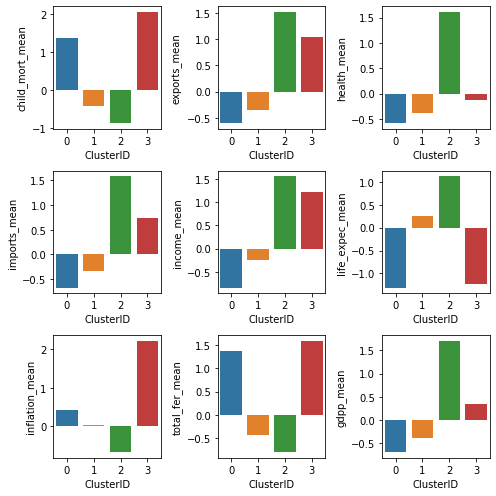

In [591]:
# plots over clusters vs variables of the dataframe
fig, axs = plt.subplots(3,3,figsize = (7,7))

sns.barplot(x=df.ClusterID, y=df_hc.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.ClusterID, y=df_hc.exports_mean, ax = axs[0,1])
sns.barplot(x=df.ClusterID, y=df_hc.health_mean, ax = axs[0,2])
sns.barplot(x=df.ClusterID, y=df_hc.imports_mean, ax = axs[1,0])
sns.barplot(x=df.ClusterID, y=df_hc.income_mean, ax = axs[1,1])
sns.barplot(x=df.ClusterID, y=df_hc.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.ClusterID, y=df_hc.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.ClusterID, y=df_hc.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.ClusterID, y=df_hc.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [593]:
hc_clustered[hc_clustered.Cluster_ID == 0].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

<font size = 6 color = Red> Final Report:

<font size = 5 color = Radium>   following are the countries which obtained by K-Means clustering and need support from NGO : </font>  
      'Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
      'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
      'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire"
      
      'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
      'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
      'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali'
      
      'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
      'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
      'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'